<a href="https://colab.research.google.com/github/PeKkaPie95/Forecasting-Using-TIme-Series/blob/main/ARIMAonStock_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing the necessary libraraies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
#loading the data for further analysis
df = pd.read_csv('/content/AAPL (1).csv', header=0)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-28,32.965000,32.987499,32.775002,32.945000,29.692596,122933200
1,2015-05-29,32.807499,32.862499,32.474998,32.570000,29.354616,203538000
2,2015-06-01,32.570000,32.847500,32.512501,32.634998,29.413195,128451200
3,2015-06-02,32.465000,32.665001,32.330002,32.490002,29.282515,134670400
4,2015-06-03,32.665001,32.735001,32.474998,32.529999,29.318565,123934000


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-05-20,79.169998,79.879997,79.129997,79.807503,78.046936,111504800
1255,2020-05-21,79.665001,80.222504,78.967499,79.212502,77.465057,102688800
1256,2020-05-22,78.942497,79.807503,78.837502,79.722504,77.963814,81803200
1257,2020-05-26,80.875000,81.059998,79.125000,79.182503,77.435715,125522000
1258,2020-05-27,79.035004,79.677498,78.272499,79.527496,77.773109,112945200


In [ ]:
#checking the type of data column date is
df['Date'].dtype

dtype('O')

In [ ]:
#converting to parse_dates
df2 = pd.read_csv('/content/AAPL (1).csv', header=0 , parse_dates=[0])

In [ ]:
df2.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-28,32.965000,32.987499,32.775002,32.945000,29.692596,122933200
1,2015-05-29,32.807499,32.862499,32.474998,32.570000,29.354616,203538000
2,2015-06-01,32.570000,32.847500,32.512501,32.634998,29.413195,128451200
3,2015-06-02,32.465000,32.665001,32.330002,32.490002,29.282515,134670400
4,2015-06-03,32.665001,32.735001,32.474998,32.529999,29.318565,123934000


In [ ]:
df2.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1254,2020-05-20,79.169998,79.879997,79.129997,79.807503,78.046936,111504800
1255,2020-05-21,79.665001,80.222504,78.967499,79.212502,77.465057,102688800
1256,2020-05-22,78.942497,79.807503,78.837502,79.722504,77.963814,81803200
1257,2020-05-26,80.875000,81.059998,79.125000,79.182503,77.435715,125522000
1258,2020-05-27,79.035004,79.677498,78.272499,79.527496,77.773109,112945200


In [ ]:
#Loading the data now as a series
series = pd.read_csv('/content/AAPL (1).csv', header=0, parse_dates=[0], index_col=0)

In [ ]:
series.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-05-28,32.965000,32.987499,32.775002,32.945000,29.692596,122933200
2015-05-29,32.807499,32.862499,32.474998,32.570000,29.354616,203538000
2015-06-01,32.570000,32.847500,32.512501,32.634998,29.413195,128451200
2015-06-02,32.465000,32.665001,32.330002,32.490002,29.282515,134670400
2015-06-03,32.665001,32.735001,32.474998,32.529999,29.318565,123934000


In [ ]:
#getting an idea of the shape of dataframe
series.shape

(1259, 6)

In [ ]:
df2.shape

(1259, 7)

In [ ]:
#getting some basic statistics of the data
series.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,41.955026,42.375441,41.576178,41.997540,39.838767,1.404843e+08
std,14.226637,14.446750,14.072141,14.282829,14.428159,6.916565e+07
min,22.500000,22.917500,22.367500,22.584999,20.772152,4.544800e+07
25%,29.123750,29.352500,28.903749,29.088751,26.772686,9.485540e+07
50%,40.105000,40.549999,39.772499,40.215000,37.845036,1.231640e+08
75%,49.912498,50.363748,49.573749,50.015001,48.223675,1.655616e+08
max,81.184998,81.962502,80.837502,81.800003,79.779510,6.488252e+08


In [ ]:
df2.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2017-11-24 18:30:35.742652928,41.955026,42.375441,41.576178,41.997540,39.838767,1.404843e+08
min,2015-05-28 00:00:00,22.500000,22.917500,22.367500,22.584999,20.772152,4.544800e+07
25%,2016-08-24 12:00:00,29.123750,29.352500,28.903749,29.088751,26.772686,9.485540e+07
50%,2017-11-22 00:00:00,40.105000,40.549999,39.772499,40.215000,37.845036,1.231640e+08
75%,2019-02-26 12:00:00,49.912498,50.363748,49.573749,50.015001,48.223675,1.655616e+08
max,2020-05-27 00:00:00,81.184998,81.962502,80.837502,81.800003,79.779510,6.488252e+08
std,NaN,14.226637,14.446750,14.072141,14.282829,14.428159,6.916565e+07


In [ ]:
#FE
#adding features to the data

dupli = df2.copy()

In [ ]:
#date parts
dupli['year'] = df2['Date'].dt.year
dupli['month'] = df2['Date'].dt.month
dupli['day'] = df2['Date'].dt.day

In [ ]:
#ensure the date column is in datetime format
dupli['Date'] = pd.to_datetime(dupli['Date'])
dupli.set_index('Date', inplace=True)

In [ ]:
#daily returns
dupli['Daily_Return'] = dupli['Close'].pct_change()


In [ ]:
#moving averages
dupli['SMA_20'] = dupli['Close'].rolling(window=20).mean()

In [ ]:
dupli['EMA_20'] = dupli['Close'].ewm(span=20, adjust=False).mean()

In [ ]:
#volatility
dupli['Volatility'] = dupli['Close'].rolling(window=20).std()

In [ ]:
#relative strength index (RSI)
def compute_rsi(data, window):
    diff = data.diff(1)
    gain = (diff.where(diff > 0, 0)).rolling(window=window).mean()
    loss = (-diff.where(diff < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

dupli['RSI'] = compute_rsi(dupli['Close'], window=14)

In [ ]:
#volume-weighted average price (VWAP)
dupli['VWAP'] = (dupli['Volume'] * (dupli['High'] + dupli['Low'] + dupli['Close']) / 3).cumsum() / dupli['Volume'].cumsum()

In [ ]:
#cumulative returns
dupli['Cumulative_Return'] = (1 + dupli['Daily_Return']).cumprod()

In [ ]:
#price range
dupli['Price_Range'] = dupli['High'] - dupli['Low']

In [ ]:
#ratios
dupli['High_Low_Ratio'] = dupli['High'] / dupli['Low']
dupli['Close_Open_Ratio'] = dupli['Close'] / dupli['Open']

In [ ]:
#Lag features
dupli['Lag_1_Close'] = dupli['Close'].shift(1)
dupli['Lag_1_Volume'] = dupli['Volume'].shift(1)

In [ ]:
#rolling metrics
dupli['Rolling_Max_20'] = dupli['Close'].rolling(window=20).max()
dupli['Rolling_Min_20'] = dupli['Close'].rolling(window=20).min()
dupli['Rolling_Median_20'] = dupli['Close'].rolling(window=20).median()

In [ ]:
#save the updated dataframe to a new CSV file
dupli.to_csv('enhanced_stock_prices.csv')

print(dupli.head())

                 Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2015-05-28  32.965000  32.987499  32.775002  32.945000  29.692596  122933200   
2015-05-29  32.807499  32.862499  32.474998  32.570000  29.354616  203538000   
2015-06-01  32.570000  32.847500  32.512501  32.634998  29.413195  128451200   
2015-06-02  32.465000  32.665001  32.330002  32.490002  29.282515  134670400   
2015-06-03  32.665001  32.735001  32.474998  32.529999  29.318565  123934000   

            year  month  day  Daily_Return  ...       VWAP  Cumulative_Return  \
Date                                        ...                                 
2015-05-28  2015      5   28           NaN  ...  32.902500                NaN   
2015-05-29  2015      5   29     -0.011383  ...  32.736247           0.988617   
2015-06-01  2015      6    1      0.001996  ...  32.716129           0.990590   
2015-06-02  2015      6    2     -

In [ ]:
#PLOTTING THE DATA
sns.set(style='whitegrid')

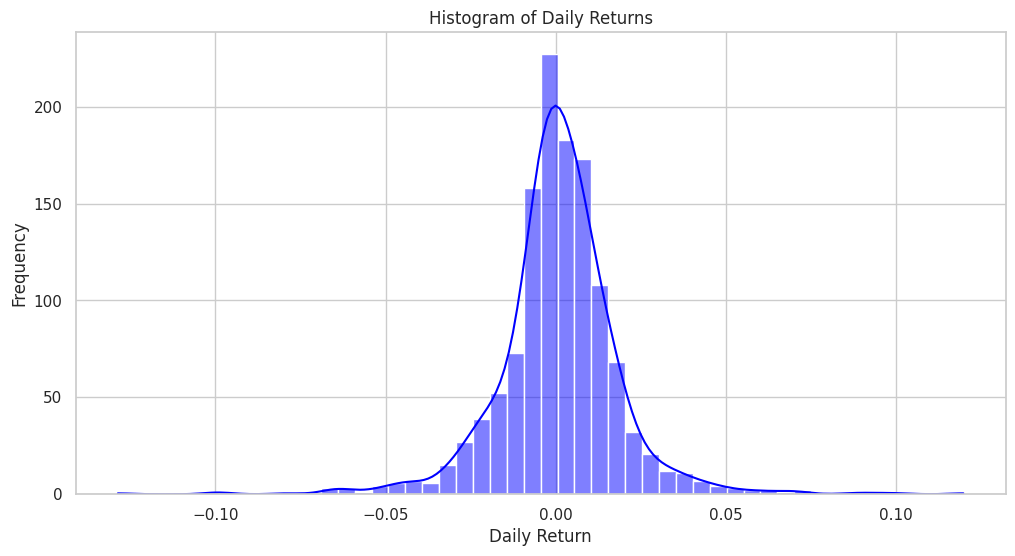

In [ ]:
#histogram of daily returns
plt.figure(figsize=(12, 6))
sns.histplot(dupli['Daily_Return'].dropna(), bins=50, kde=True, color='blue')
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


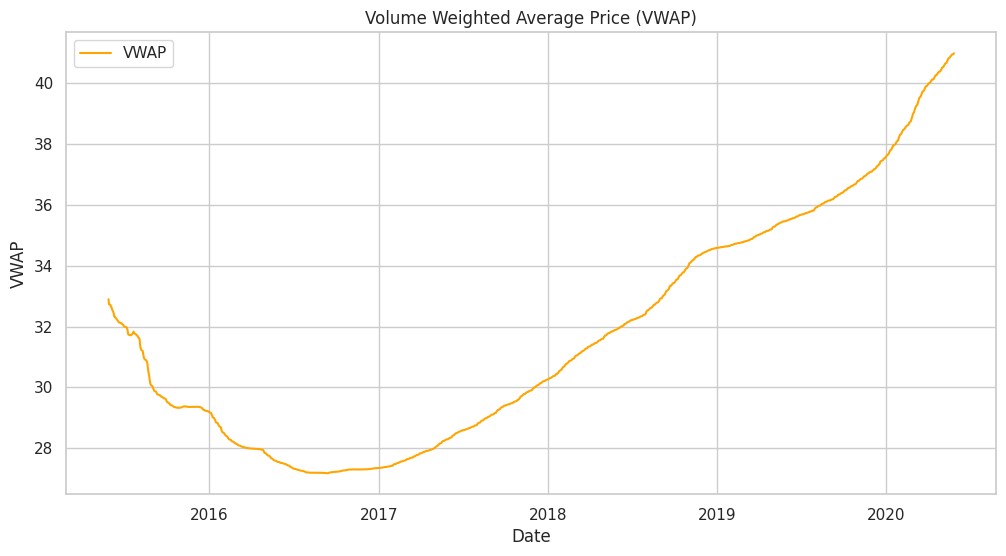

In [ ]:
#line plot of VWAP
plt.figure(figsize=(12, 6))
plt.plot(dupli.index, dupli['VWAP'], label='VWAP', color='orange')
plt.title('Volume Weighted Average Price (VWAP)')
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()
plt.show()


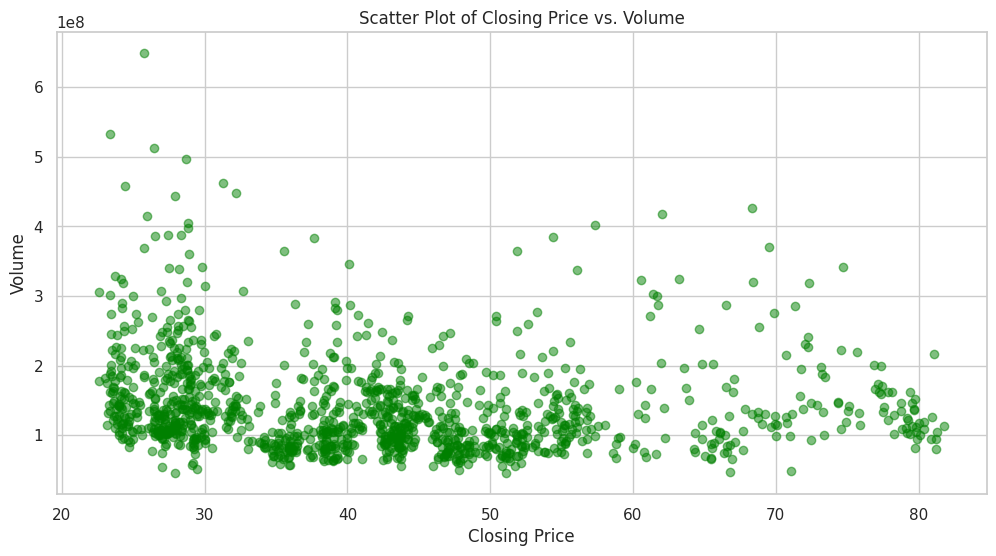

In [ ]:
#scatter plot of closing-price vs volume
plt.figure(figsize=(12, 6))
plt.scatter(dupli['Close'], dupli['Volume'], alpha=0.5, color='green')
plt.title('Scatter Plot of Closing Price vs. Volume')
plt.xlabel('Closing Price')
plt.ylabel('Volume')
plt.show()

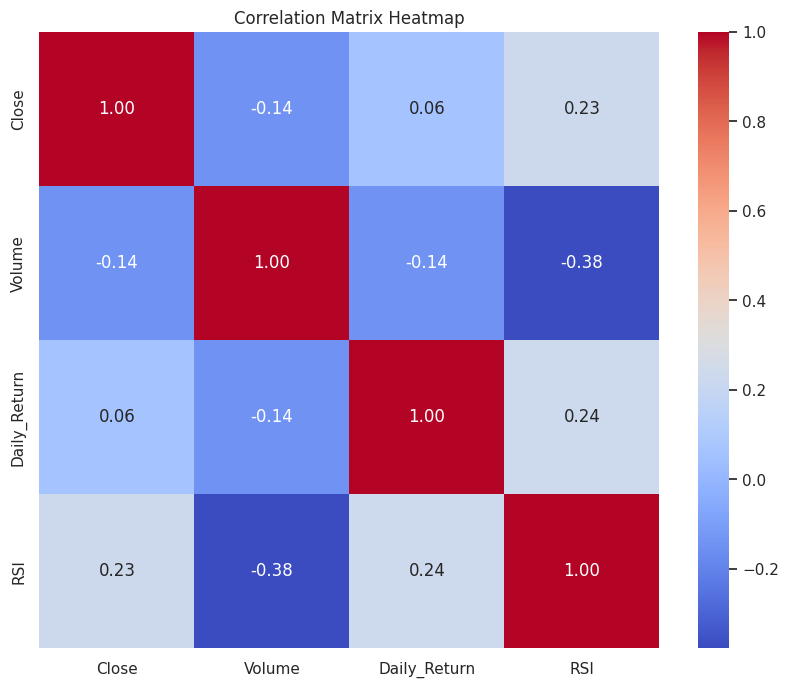

In [ ]:
#heatmap of correlation matrix
corr_matrix = dupli[['Close', 'Volume', 'Daily_Return', 'RSI']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

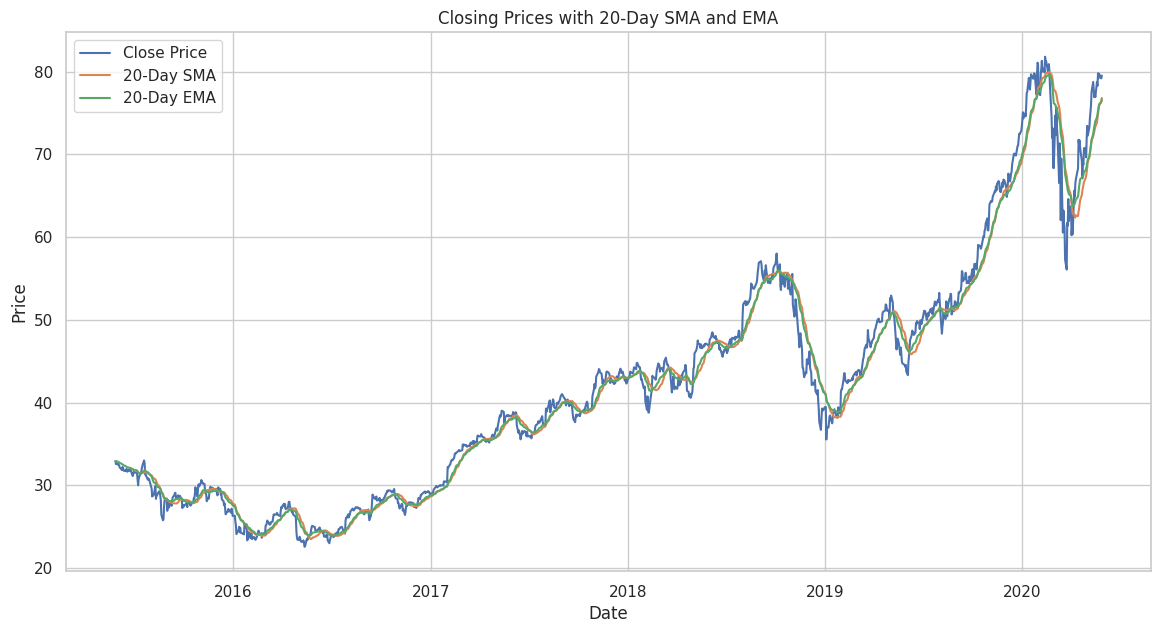

In [ ]:
#plot closing prices with moving averages
plt.figure(figsize=(14, 7))
plt.plot(dupli.index, dupli['Close'], label='Close Price')
plt.plot(dupli.index, dupli['SMA_20'], label='20-Day SMA')
plt.plot(dupli.index, dupli['EMA_20'], label='20-Day EMA')
plt.title('Closing Prices with 20-Day SMA and EMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

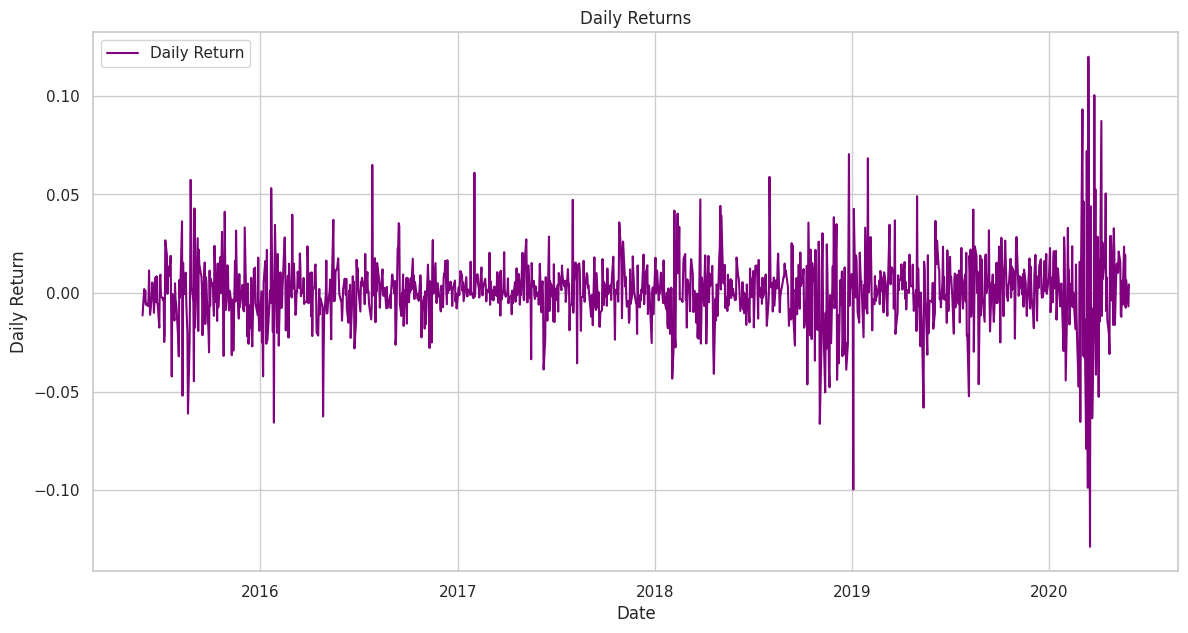

In [ ]:
#plot daily returns
plt.figure(figsize=(14, 7))
plt.plot(dupli.index, dupli['Daily_Return'], label='Daily Return', color='purple')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

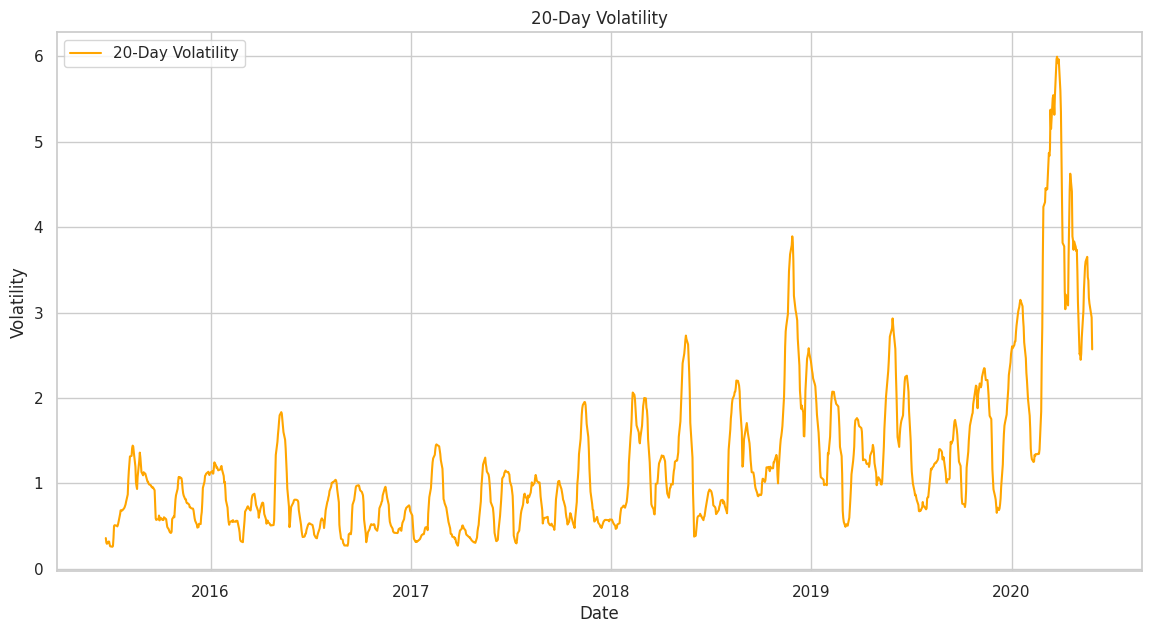

In [ ]:
#plot volatility
plt.figure(figsize=(14, 7))
plt.plot(dupli.index, dupli['Volatility'], label='20-Day Volatility', color='orange')
plt.title('20-Day Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


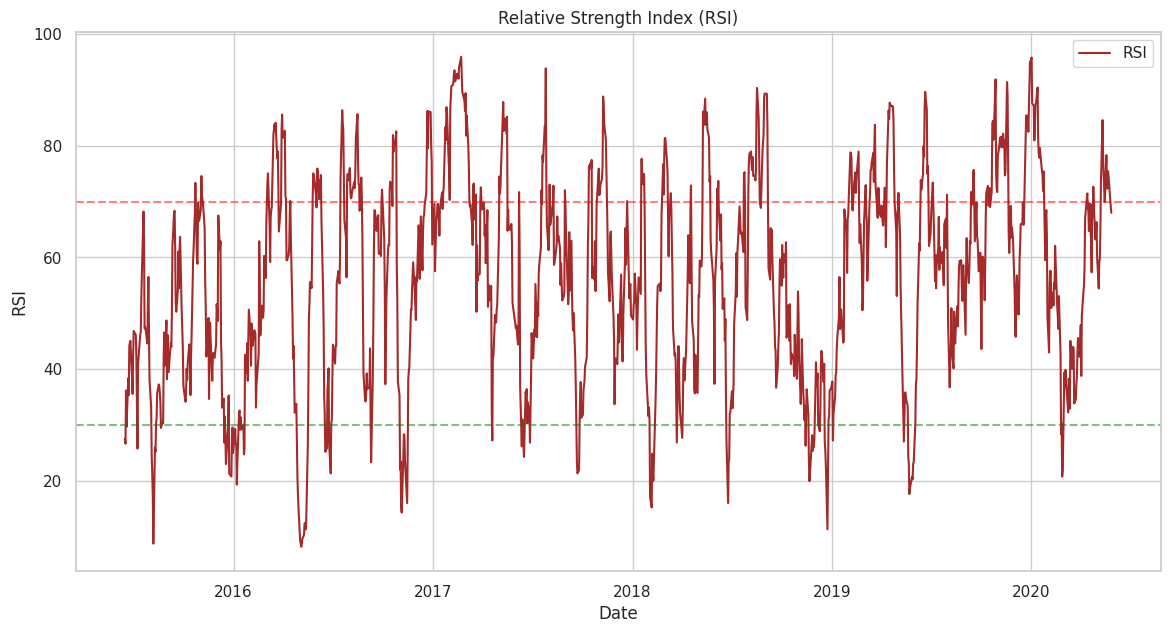

In [ ]:
#plot RSI
plt.figure(figsize=(14, 7))
plt.plot(dupli.index, dupli['RSI'], label='RSI', color='brown')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


**PREDICTION USING THE ARIMA MODEL**

In [ ]:
#split data into training and testing sets (80:20 ratio)
train_size = 0.8
split_index = int(train_size * len(df2))

train_data = df2.iloc[:split_index]
test_data = df2.iloc[split_index:]

In [ ]:
#taking logarithm of both training and testing sets
train_data['Log_Close'] = np.log(train_data['Close'])

<ipython-input-102-c6877fee471b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Log_Close'] = np.log(train_data['Close'])


In [ ]:
# Differencing the log data(first order)
train_data['Log_Close_Diff'] = train_data['Log_Close'].diff()

<ipython-input-103-4b6ba145973a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Log_Close_Diff'] = train_data['Log_Close'].diff()


In [ ]:
#second order diffrencing
train_data['Log_Close_Diff_2'] = train_data['Log_Close_Diff'].diff()

<ipython-input-104-eba44e407c93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Log_Close_Diff_2'] = train_data['Log_Close_Diff'].diff()


In [ ]:
#third order diffrencing
train_data['Log_Close_Diff_3'] = train_data['Log_Close_Diff_2'].diff()

<ipython-input-105-2114c2fc1dc4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Log_Close_Diff_3'] = train_data['Log_Close_Diff_2'].diff()


**Figuring out the value of d using visual methods and Augmented Dickey-Fuller test**


In [ ]:
series2 = df2['Close']
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Perform Augmented Dickey-Fuller test
result = adfuller(series2)

# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpret results
if result[1] < 0.05:
    print("Reject the null hypothesis (H0). The time series is stationary.")
else:
    print("Fail to reject the null hypothesis (H0). The time series is non-stationary.")

ADF Statistic: -0.13291441061439618
p-value: 0.946059836875779
Critical Values:
	1%: -3.435634587707382
	5%: -2.8638736617392837
	10%: -2.568012472034339
Fail to reject the null hypothesis (H0). The time series is non-stationary.


In [ ]:
# Perform first differencing
diff_series2 = series2.diff().dropna()

# Perform ADF test on differenced series
result_diff = adfuller(diff_series2)

# Print results
print('ADF Statistic (After differencing):', result_diff[0])
print('p-value (After differencing):', result_diff[1])

# Interpret results
if result_diff[1] < 0.05:
    print("Reject the null hypothesis (H0). The differenced series is stationary.")
else:
    print("Fail to reject the null hypothesis (H0). The differenced series is non-stationary.")

ADF Statistic (After differencing): -6.31799928782653
p-value (After differencing): 3.1160168841276356e-08
Reject the null hypothesis (H0). The differenced series is stationary.


**we get the series as stationary**

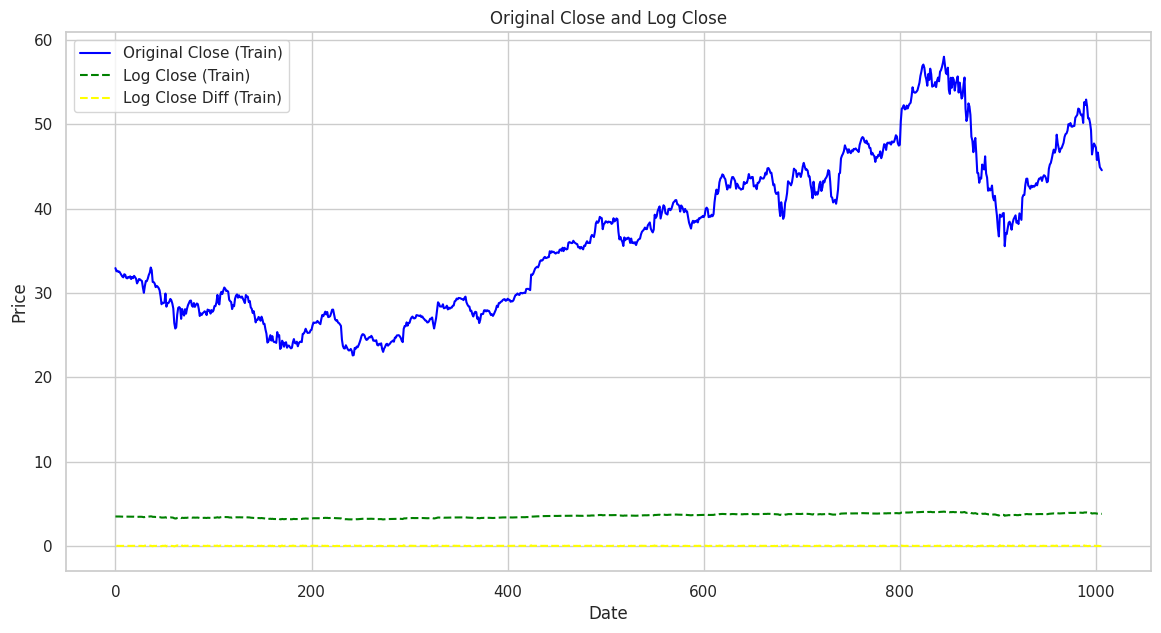

        Date       Open       High        Low      Close  Adj Close  \
0 2015-05-28  32.965000  32.987499  32.775002  32.945000  29.692596   
1 2015-05-29  32.807499  32.862499  32.474998  32.570000  29.354616   
2 2015-06-01  32.570000  32.847500  32.512501  32.634998  29.413195   
3 2015-06-02  32.465000  32.665001  32.330002  32.490002  29.282515   
4 2015-06-03  32.665001  32.735001  32.474998  32.529999  29.318565   

      Volume  Log_Close  Log_Close_Diff  Log_Close_Diff_2  Log_Close_Diff_3  
0  122933200   3.494840             NaN               NaN               NaN  
1  203538000   3.483392       -0.011448               NaN               NaN  
2  128451200   3.485385        0.001994          0.013442               NaN  
3  134670400   3.480932       -0.004453         -0.006447         -0.019888  
4  123934000   3.482163        0.001230          0.005683          0.012130  
           Date       Open       High        Low      Close  Adj Close  \
1007 2019-05-29  44.105000  44.

In [ ]:
# Plot original 'Close', 'Log_Close', and 'Log_Close_Diff' for visualization (optional)

plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Original Close (Train)', color='blue')
plt.plot(train_data.index, train_data['Log_Close'], label='Log Close (Train)', color='green', linestyle='--')
plt.plot(train_data.index, train_data['Log_Close_Diff'], label='Log Close Diff (Train)', color='yellow', linestyle='--')
#plt.plot(train_data.index, train_data['Log_Close_Diff_2'], label='Log Close Diff (Train)', color='orange', linestyle='--')
#plt.plot(train_data.index, train_data['Log_Close_Diff_3'], label='Log Close Diff (Train)', color='red', linestyle='--')
plt.title('Original Close and Log Close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print(train_data.head())
print(test_data.head())

we can remove the hastag to un-comment the lins of code and compare to find the value of d and find that the **value of d is 1**

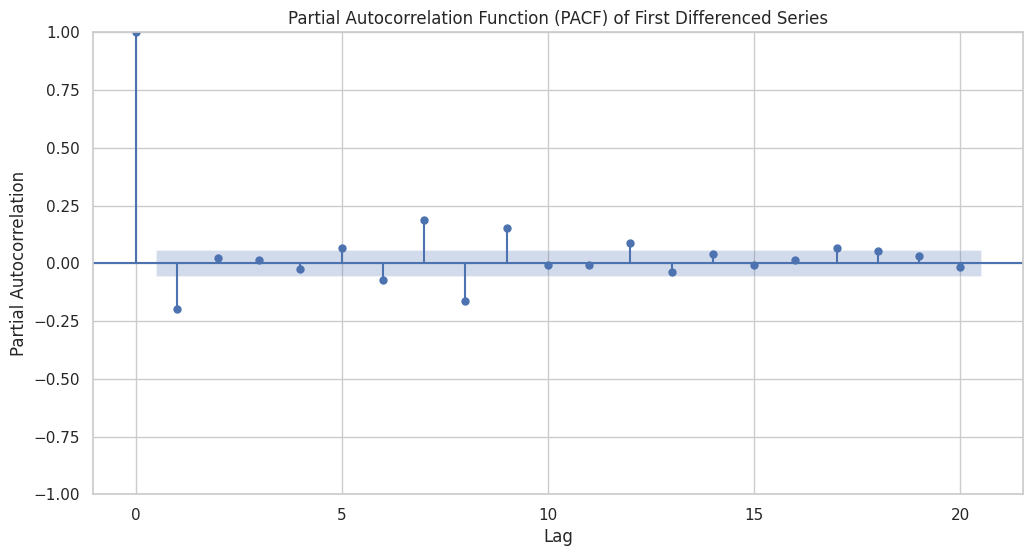

In [ ]:
#finding p with PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df2['Close'].diff().dropna(), ax=ax, lags=20)
ax.set_xlabel('Lag')
ax.set_ylabel('Partial Autocorrelation')
ax.set_title('Partial Autocorrelation Function (PACF) of First Differenced Series')
plt.show()

**we get value of p as 1**

In [ ]:
#finding q using acf
from statsmodels.graphics.tsaplots import plot_acf

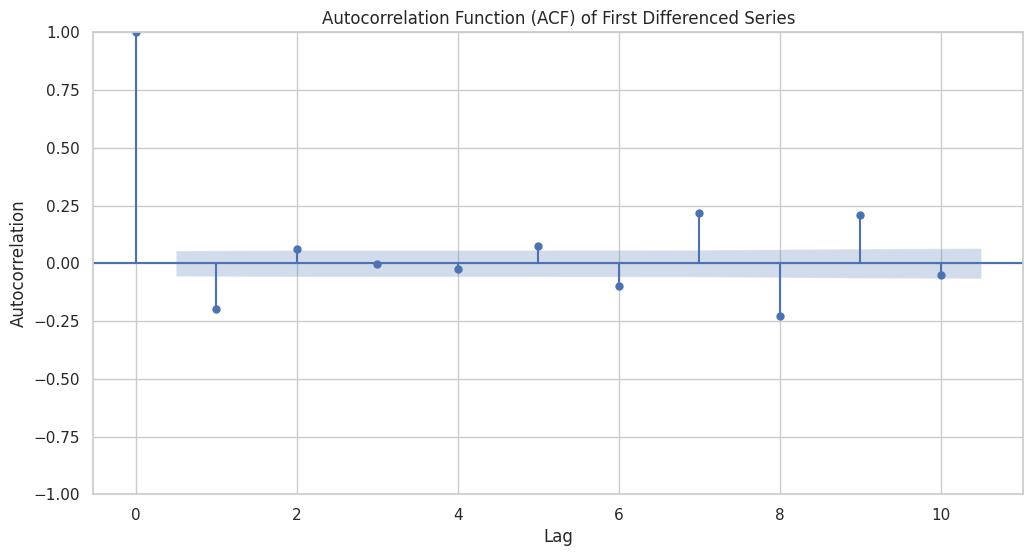

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_acf(df2['Close'].diff().dropna(), ax=ax, lags=10)
ax.set_xlabel('Lag')
ax.set_ylabel('Autocorrelation')
ax.set_title('Autocorrelation Function (ACF) of First Differenced Series')
plt.show()

**we may use value q as 1**

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00


In [ ]:
#comparing with auto-ARIMA
from pmdarima.arima import auto_arima

model = auto_arima(df2['Close'].diff().dropna(),
                   start_p=1, start_q=1,
                   test='adf',
                   max_p=5, max_q=5,
                   m=1,
                   d=0,    # Since the data is already differenced once (d=1), set d=0 for the differenced series
                   seasonal=False,
                   start_P=0,
                   D=None,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3306.535, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3352.926, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=3305.185, Time=0.05 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3309.355, Time=0.10 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=3306.388, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3302.753, Time=0.43 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=3270.024, Time=0.88 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=3307.974, Time=0.12 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=3264.373, Time=0.78 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=3309.307, Time=0.17 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=3252.810, Time=1.00 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=3305.168, Time=0.21 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=3256.956, Time=1.32 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=3270.986, Time=1.43 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept

*we found the value of q matching with auto arima and d almost near lets try implementing the arima model*

In [ ]:
#Use the determined parameters 𝑝,𝑑,𝑞 to fit the ARIMA model on the training data
p, d, q = 1, 1, 1

# Fit ARIMA model on training data
model = ARIMA(df2['Close'], order=(p, d, q))
fitted_model = model.fit()

# Print model summary
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1650.268
Date:                Tue, 02 Jul 2024   AIC                           3306.535
Time:                        21:21:25   BIC                           3321.947
Sample:                             0   HQIC                          3312.327
                               - 1259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2945      0.049     -6.066      0.000      -0.390      -0.199
ma.L1          0.1014      0.053      1.914      0.056      -0.002       0.205
sigma2         0.8071      0.012     67.436      0.0

In [ ]:
# Forecast using ARIMA model on the testing data
forecast_result = fitted_model.get_forecast(len(test_data))
forecast = forecast_result.predicted_mean
conf_int = forecast_result.conf_int()

# Calculate Mean Squared Error (MSE) for evaluation
mse = mean_squared_error(test_data['Close'], forecast)
print(f"Mean Squared Error (MSE) on test data: {mse}")

Mean Squared Error (MSE) on test data: 379.1919128361167
